<a href="https://colab.research.google.com/github/Yash22222/TSF-GRIP-TASKS/blob/main/T_1_SML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TSF - Data Science and Business Analytics Internship

T-1:- Prediction Using Unsupervised ML (Beginner Level)
PS:- Predict the Percentage of an student based on the number of study hours

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [60]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [61]:
data.shape

(25, 2)

In [62]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [64]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [65]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [66]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


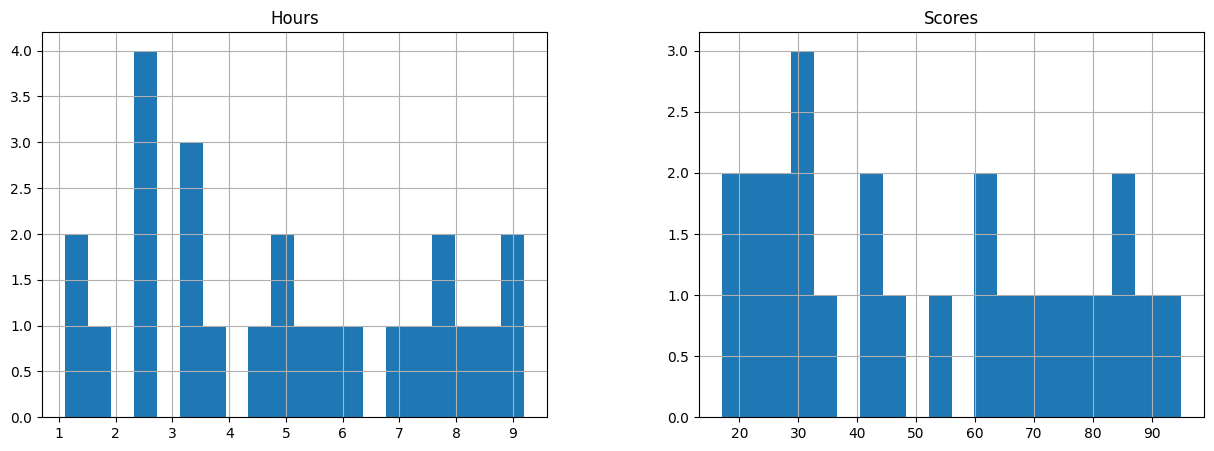

In [67]:
data.hist(bins = 20,figsize = (15,5));

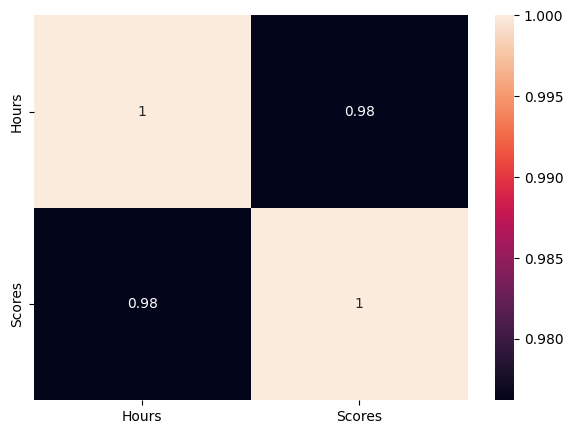

In [68]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

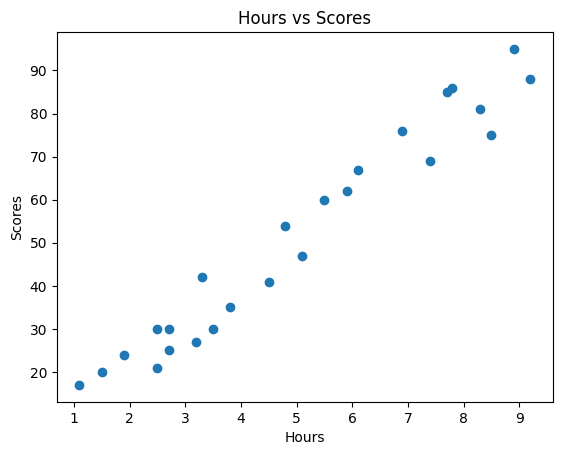

In [69]:
plt.scatter(data["Hours"],data["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores");

In [70]:
y=data["Scores"]
X=data.drop("Scores",axis=1)

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((20, 1), (5, 1))

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [73]:
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

In [74]:
from sklearn.metrics import mean_squared_error
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

In [75]:
print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.952
Linear Regression: Accuracy on test Data: 0.945

Linear Regression: The RMSE of the training set is: 5.558613350226344
Linear Regression: The RMSE of the testing set is: 4.647447612100373


In [76]:
dict={"Actual":y_train,"Predicted":y_train_lr}
new_data=pd.DataFrame(dict)
new_data=new_data.reset_index(drop=1)
new_data.head()

,Actual,Predicted
0,35,39.678655
1,24,20.848407
2,86,79.321281
3,76,70.401690
4,17,12.919882


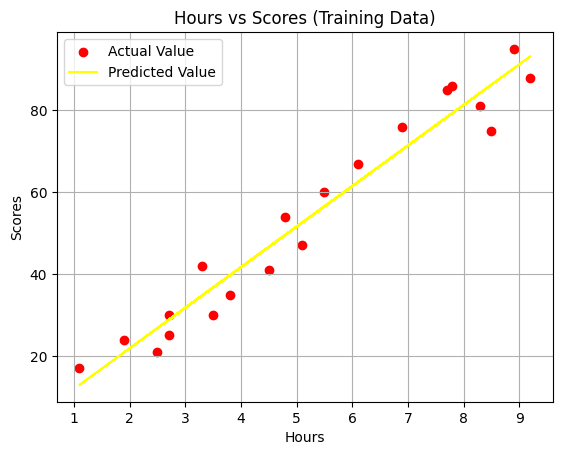

In [77]:
plt.scatter(X_train,y_train,label="Actual Value",color="red")
plt.plot(X_train,y_train_lr,label="Predicted Value",color="yellow")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores (Training Data)")
plt.grid(True)
plt.legend();

In [78]:
dict={"Actual":y_test,"Predicted":y_test_lr}
new_data=pd.DataFrame(dict)
new_data=new_data.reset_index(drop=1)
new_data.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


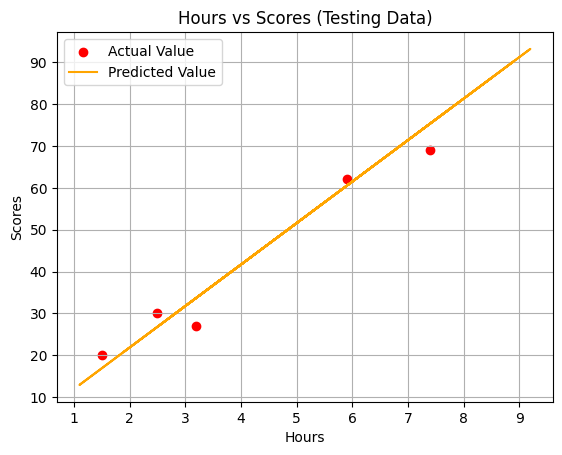

In [79]:
plt.scatter(X_test,y_test,label="Actual Value",color="red")
plt.plot(X_train,y_train_lr,label="Predicted Value",color="orange")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores (Testing Data)")
plt.grid(True)
plt.legend();

In [80]:
result=lr.predict([[9.25]])
print("The Predicted score of student comes to be {:.3f} if a student studies for 9.25 hrs/ day.".format(result[0]))

The Predicted score of student comes to be 93.692 if a student studies for 9.25 hrs/ day.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
